In [1]:
import pandas as pd

In [2]:
mall = pd.read_csv('mall_kmeans.csv')

In [3]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
mall.drop(columns='CustomerID', inplace=True)
# DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

In [5]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
mall.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [7]:
mall.Genre = mall.Genre.replace({'Male':0, 'Female':1})

In [8]:
from sklearn.cluster import KMeans

In [10]:
ssd_mall = []
for i in range(1,10):
    kmeans_mall = KMeans(n_clusters=i)
    kmeans_mall.fit(mall)
    score_mall = kmeans_mall.score(mall)
    ssd_mall.append(score_mall)
ssd_mall    

[-308862.06000000006,
 -212889.44245524288,
 -143391.5923603567,
 -104414.67534220172,
 -75399.61541401484,
 -58362.95546871428,
 -51145.004186663,
 -44392.11566567933,
 -41395.484656593406]

In [11]:
import numpy as np

In [12]:
ssd_mall = np.round(np.abs(ssd_mall))
ssd_mall

array([308862., 212889., 143392., 104415.,  75400.,  58363.,  51145.,
        44392.,  41395.])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

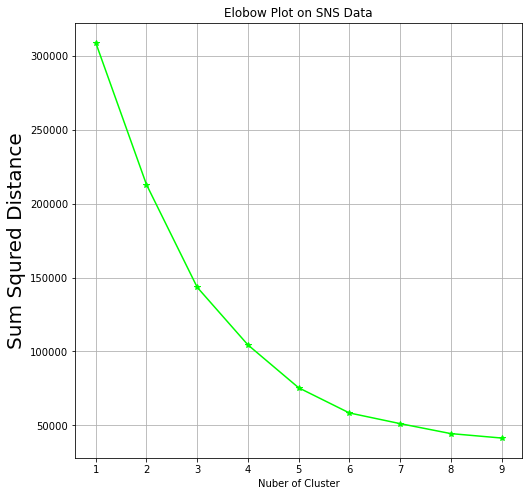

In [13]:
number = [1,2,3,4,5,6,7,8,9]

plt.figure(figsize = (8,8))
# number = [1,2,3,4,5,6,7,8,9,10]
plt.plot(number, ssd_mall, marker = "*", color = 'lime')
plt.title("Elobow Plot on SNS Data")
plt.xlabel('Nuber of Cluster')
plt.ylabel('Sum Squred Distance', size = 20)
# plt.text(x = 4,y=8109653, s = 'K = 4 is Optimum Choice', size = 15)
plt.grid()